In [9]:
%pip install wbdata

import wbdata

# Return list of all country/region codes:
# wbdata.get_countries()

Note: you may need to restart the kernel to use updated packages.


In [10]:
# wbdata.get_sources()

In [3]:
SOURCE = 2 # World Development Indicators

indicators = wbdata.get_indicators(source=SOURCE)
indicators

id                          name
--------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.CON.FERT.PT.ZS           Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS              Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2              Agricultural land (sq. km)
AG.LND.AGRI.ZS              Agricultural land (% of land area)
AG.LND.ARBL.HA              Arable land (hectares)
AG.LND.ARBL.HA.PC           Arable land (hectares per person)
AG.LND.ARBL.ZS              Arable land (% of land area)
AG.LND.CREL.HA              Land under cereal production (hectares)
AG.LND.CROP.ZS              Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2           Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS           Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# pull Current health expenditure per capita (current US$)
health_expenditures = {"SH.XPD.CHEX.PC.CD": "Health Expenditure per Capita"}

# pull PM2.5 air pollution, mean annual exposure
air_pollution = {"EN.ATM.PM25.MC.M3": "PM2.5 Air Pollution (µg/m³)"}

# Create a date range as strings
date_range = (str(2000), str(2019))

In [5]:
# Health expenditures dataframe
health_df = wbdata.get_dataframe(health_expenditures, country="Bol", date = date_range)
print(health_df.head())

      Health Expenditure per Capita
date                               
2019                     239.175446
2018                     229.225403
2017                     212.879135
2016                     205.922440
2015                     194.924011


In [6]:
# PM2.5 air pollution, mean annual exposure
air_df = wbdata.get_dataframe(air_pollution, country = "Bol", date = date_range)
print(air_df.head())

      PM2.5 Air Pollution (µg/m³)
date                             
2019                    24.484992
2018                    25.166759
2017                    26.541863
2016                    28.054614
2015                    27.457471


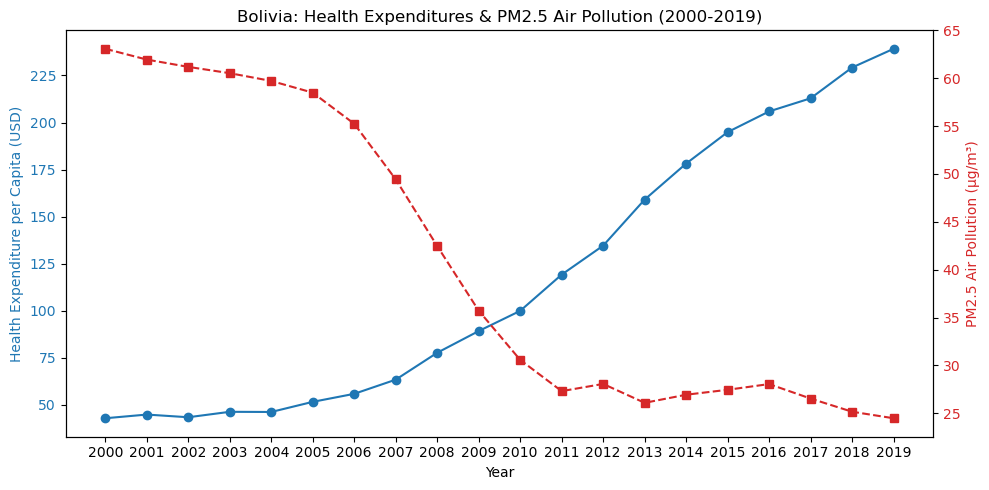

In [7]:
# Merge data into a single DataFrame
data = health_df.merge(air_df, left_index=True, right_index=True)

# Sort data by year (ascending order)
data.sort_index(inplace=True)

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Health Expenditures
ax1.set_xlabel("Year")
ax1.set_ylabel("Health Expenditure per Capita (USD)", color="tab:blue")
ax1.plot(data.index, data["Health Expenditure per Capita"], color="tab:blue", marker="o", label="Health Expenditure")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a second y-axis for PM2.5 Air Pollution
ax2 = ax1.twinx()
ax2.set_ylabel("PM2.5 Air Pollution (µg/m³)", color="tab:red")
ax2.plot(data.index, data["PM2.5 Air Pollution (µg/m³)"], color="tab:red", marker="s", linestyle="dashed", label="PM2.5 Air Pollution")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Add a title and show the plot
plt.title("Bolivia: Health Expenditures & PM2.5 Air Pollution (2000-2019)")
fig.tight_layout()
plt.savefig("Bolivia Health and Air Pollution")
plt.show()